In [27]:
%matplotlib inline
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from config import api_key

In [2]:
titles = []
release_dates = []
overview = []

for x in range(32):
    url = "https://api.themoviedb.org/3/discover/movie?&sort_by=revenue.desc&api_key="+api_key+"&page="+str(x+1)+"&with_keywords=9738|9951"
    response = requests.get(url)
    data = response.json() 
    for y in range(len(data["results"])):
        titles.append(data["results"][y]["title"])
        release_dates.append(data["results"][y]["release_date"])
        overview.append(data["results"][y]["overview"])

In [28]:
#print(len(titles))

In [4]:
years = []
months = []
for x in range(len(release_dates)):
    try:
        y = release_dates[x]
        year = y.split("-")[0]
        month = y.split("-")[1]
        years.append(year)
        months.append(month)
    except:
        years.append("")
        months.append("")

In [5]:
movie_data = {
    "Titles":titles,
    "Year":years,
    "Month": months,
    "Overview":overview
}

movie_df = pd.DataFrame(data=movie_data)
movie_df.head()

,Month,Overview,Titles,Year
0,12,"In the 22nd century, a paraplegic Marine is di...",Avatar,2009
1,06,"As humanity picks up the pieces, following the...",Transformers: Age of Extinction,2014
2,04,After a gentle alien becomes stranded on Earth...,E.T. the Extra-Terrestrial,1982
3,06,"Young teenager, Sam Witwicky becomes involved ...",Transformers,2007
4,05,Agents J (Will Smith) and K (Tommy Lee Jones) ...,Men in Black 3,2012


In [29]:
movie_df.to_csv("ufo_movies.csv")

In [30]:
year_df = movie_df.groupby(movie_df["Year"],as_index=False)
year_df = year_df["Titles"].count()
year_df = year_df[year_df.Year != ""]
year_df["Year"] = year_df["Year"].astype(int)

In [31]:
bins = [0,1959,1969,1979,1989,1999,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
bin_labels = ["before 1959","1960s","1970s","1980s","1990s","early 2000s","'07","'08","'09","'10","'11","'12","'13","'14","'15","'16","'17","'18"]
#print(len(bins))
#print(len(bin_labels))

In [32]:
year_df["Decade"] = pd.cut(year_df["Year"],bins,labels=bin_labels)
movies_by_year = year_df.groupby(year_df["Decade"],as_index=False).sum()
movies_by_year.tail()

,Decade,Year,Titles
13,'14,2014,20
14,'15,2015,37
15,'16,2016,19
16,'17,2017,23
17,'18,2018,2


In [33]:
decades = list(movies_by_year["Decade"])
counts = list(movies_by_year["Titles"])
#print(len(decades))

Text(0.5,1.08,'Count of top grossing films, having plots about "UFOs" or "Aliens", by decade')

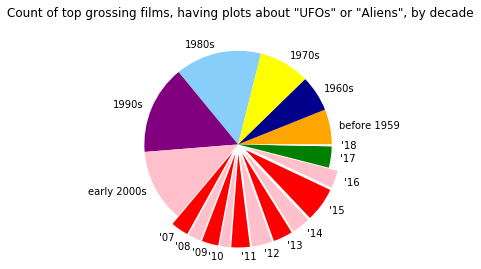

In [39]:
# Labels for the sections of our pie chart
labels = decades

# The values of each section of the pie chart
sizes = counts

# The colors of each section of the pie chart
colors = ["orange", "darkblue", "yellow", "lightskyblue","purple","pink","red","pink","red","pink","red","pink","red","pink","red","pink","green","white"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0, 0)

plt.pie(sizes, labels=labels, colors=colors,labeldistance=1.1,explode = explode)
plt.axis('equal')
plt.title("Count of top grossing films, having plots about \"UFOs\" or \"Aliens\", by decade",y=1.08)


In [34]:
recent_counts = counts[6:16]
recent_years = decades[6:16]

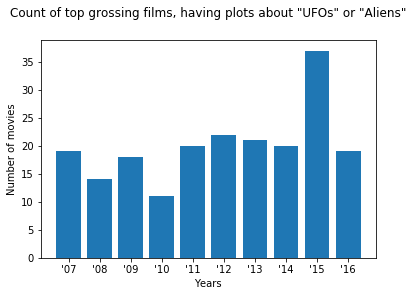

In [35]:
plt.bar(recent_years,recent_counts,align="center")
plt.title("Count of top grossing films, having plots about \"UFOs\" or \"Aliens\"",y = 1.08)
plt.xlabel("Years")
plt.ylabel("Number of movies")
plt.show()

<BarContainer object of 10 artists>

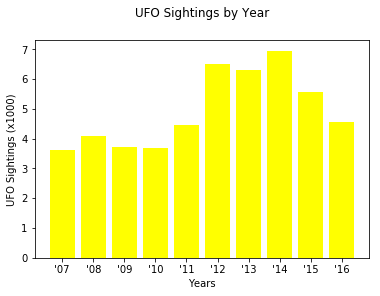

In [36]:
ufo_sightings = [3.605,4.100,3.709,3.694,4.457,6.503,6.317,6.954,5.565,4.552]
plt.title("UFO Sightings by Year",y = 1.08)
plt.xlabel("Years")
plt.ylabel("UFO Sightings (x1000)")
plt.bar(recent_years,ufo_sightings,color="yellow",align="center")